# TASK-2
# CREDIT CARD FRAUD DETECTION

# Install the necessory librarys

#### !pip install numpy
#### !pip install pandas
#### !pip install matplotlib
#### !pip install sklearn

# Importing libraries

In [40]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [41]:
# Load the dataset (Assuming you have a CSV file with features and labels)
# Replace 'your_dataset.csv' with the actual file path
data = pd.read_csv("C:\\Users\\mohan\\Downloads\\CodeTech Internship\\creditcard.csv")

In [42]:
# Explore the dataset and preprocess if needed
# Ensure that the dataset has columns like 'Amount', 'V1', 'V2', ..., 'V28', 'Class'

# Split the data into features (X) and labels (y)
X = data.drop('Class', axis=1)
y = data['Class']

In [43]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [45]:
# Initialize and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [46]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [47]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [48]:
# Print the evaluation metrics
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)

Accuracy: 0.9991222218320986
Confusion Matrix:
[[56855     9]
 [   41    57]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.58      0.70        98

    accuracy                           1.00     56962
   macro avg       0.93      0.79      0.85     56962
weighted avg       1.00      1.00      1.00     56962



# Visualize the Confusion Matrix

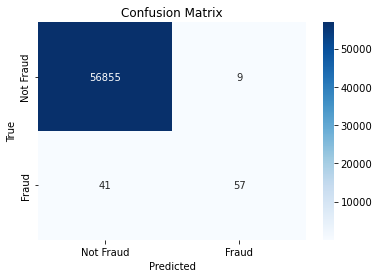

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
# Visualize the Confusion Matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

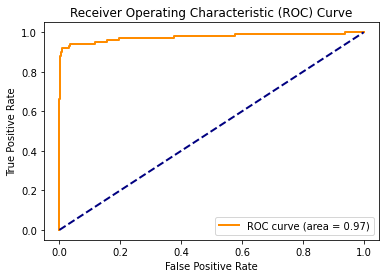

In [50]:
from sklearn.metrics import roc_curve, auc

y_scores = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

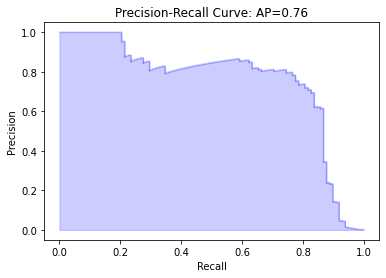

In [51]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, _ = precision_recall_curve(y_test, y_scores)
average_precision = average_precision_score(y_test, y_scores)

plt.figure()
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve: AP={0:0.2f}'.format(average_precision))
plt.show()

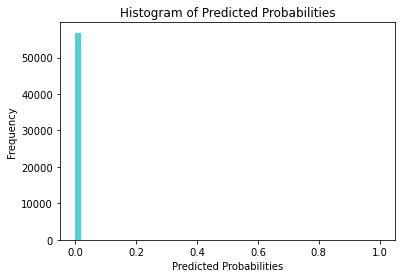

In [52]:
plt.figure()
plt.hist(y_scores, bins=50, color='c', alpha=0.7)
plt.xlabel('Predicted Probabilities')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted Probabilities')
plt.show()

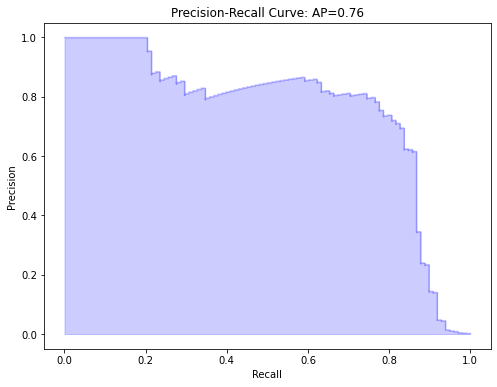

In [53]:
from sklearn.metrics import precision_recall_curve, average_precision_score
y_scores = model.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_scores)
average_precision = average_precision_score(y_test, y_scores)
plt.figure(figsize=(8, 6))
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve: AP={0:0.2f}'.format(average_precision))
plt.show()


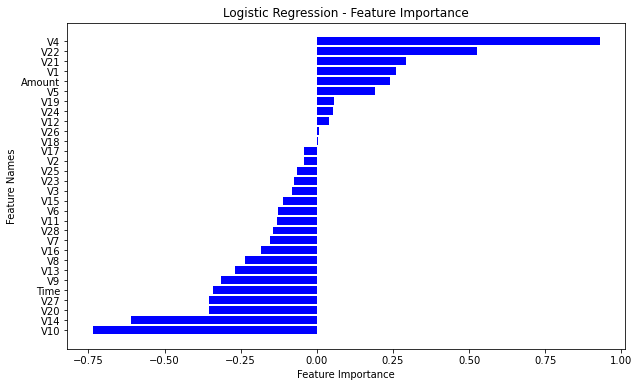

In [54]:
if hasattr(model, 'coef_'):
    feature_importance = model.coef_[0]
    feature_names = X.columns

    # Sort features based on their importance
    sorted_indices = feature_importance.argsort()

    plt.figure(figsize=(10, 6))
    plt.barh(range(len(sorted_indices)), feature_importance[sorted_indices], color='blue')
    plt.yticks(range(len(sorted_indices)), feature_names[sorted_indices])
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature Names')
    plt.title('Logistic Regression - Feature Importance')
    plt.show()


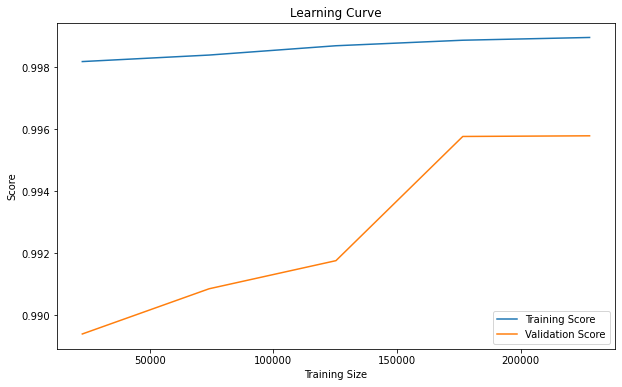

In [56]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, scoring='accuracy', n_jobs=-1)
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Validation Score')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend()
plt.show()